In [1]:
import numpy as np
import pandas as pd  # import pandas
import matplotlib.pyplot as plt
import seaborn as sns   # import seaborn for visualisastion
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import t
from scipy.stats import wilcoxon
from scipy.stats import ranksums
from scipy.stats import mannwhitneyu
from scipy import stats
from scipy.stats import sem
import pingouin as pt
from statistics import mean
import easygui
import itertools
from statistics import median

In [138]:
df = easygui.fileopenbox(title="Select a file", filetypes= None)
df = pd.read_excel(df)

In [139]:
df.head()

,Rats_ID,Time total [s],Time open total[s],Time open total[%],Time close total[s],Time close total[%],Time center total [s],Time center total [%],Time total_bin1 [s],Time open total_bin1[s],...,Distance immobility_total_open_bin3 [cm],Distance mobility_total_close_bin3 [cm],Entry_open_total,Entry_open_total_bin1,Entry_open_total_bin2,Entry_open_total_bin3,Entry_center_total,Entry_center_total_bin1,Entry_center_total_bin2,Entry_center_total_bin3
0,zw1_ctrl_kohAprimDLC,1882,183,9.72,765,40.65,73,3.88,627,75,...,427.40,232.49,22,10,5,7,23,10,6,7
1,zw7_exp_kohAprimDLC,1904,117,6.14,749,39.34,129,6.78,635,12,...,227.47,1151.11,16,3,4,9,59,21,21,17
2,zw11_exp_kohAprimDLC,1892,6,0.32,1206,63.74,104,5.50,631,1,...,10.78,94.16,4,2,0,2,24,17,5,2
3,zw12_exp_kohAprimDLC,1890,37,1.96,1608,85.08,18,0.95,630,12,...,89.59,150.68,5,3,1,1,14,9,4,1
4,zw1_exp_kohCDLC,1870,28,1.50,1292,69.09,47,2.51,623,5,...,37.25,307.05,4,2,1,1,25,14,7,4


In [140]:
column_list = df.columns.tolist()
column_list = column_list[1:]

In [141]:
rats_id = df["Rats_ID"].tolist()
group = ["e" if "exp" in i else "c" for i in rats_id]
df["group"] = group
df.head()

,Rats_ID,Time total [s],Time open total[s],Time open total[%],Time close total[s],Time close total[%],Time center total [s],Time center total [%],Time total_bin1 [s],Time open total_bin1[s],...,Distance mobility_total_close_bin3 [cm],Entry_open_total,Entry_open_total_bin1,Entry_open_total_bin2,Entry_open_total_bin3,Entry_center_total,Entry_center_total_bin1,Entry_center_total_bin2,Entry_center_total_bin3,group
0,zw1_ctrl_kohAprimDLC,1882,183,9.72,765,40.65,73,3.88,627,75,...,232.49,22,10,5,7,23,10,6,7,c
1,zw7_exp_kohAprimDLC,1904,117,6.14,749,39.34,129,6.78,635,12,...,1151.11,16,3,4,9,59,21,21,17,e
2,zw11_exp_kohAprimDLC,1892,6,0.32,1206,63.74,104,5.50,631,1,...,94.16,4,2,0,2,24,17,5,2,e
3,zw12_exp_kohAprimDLC,1890,37,1.96,1608,85.08,18,0.95,630,12,...,150.68,5,3,1,1,14,9,4,1,e
4,zw1_exp_kohCDLC,1870,28,1.50,1292,69.09,47,2.51,623,5,...,307.05,4,2,1,1,25,14,7,4,e


In [142]:
check_noramlity = pd.DataFrame(columns = ["W", "p-value", "normal", "feature", "group"])
n = 0
for i in column_list:
    if "None" not in df[i].tolist(): 
        ctrl_group = pt.normality(df.loc[(df["group"] == "c") & (df[i] != "None"), i]).values.tolist()
        ctrl_group = list(itertools.chain(*ctrl_group))
        ctrl_group.append(i)
        ctrl_group.append("c")
    
        exp_group = pt.normality(df.loc[(df["group"] == "e") & (df[i] != "None"), i]).values.tolist()
        exp_group = list(itertools.chain(*exp_group))
        exp_group.append(i)
        exp_group.append("e")
    
        check_noramlity.loc[n] = exp_group
        check_noramlity.loc[n+1] = ctrl_group
        n +=2
    else:
        print(i)

Velocity mobility_total_open [cm/s]
Velocity mobility_total_open_bin1 [cm/s]
Velocity mobility_total_open_bin2 [cm/s]
Velocity immobility_total_open_bin2 [cm/s]
Velocity mobility_total_open_bin3 [cm/s]
Velocity immobility_total_open_bin3 [cm/s]


In [143]:
check_noramlity.to_excel( "C:/Users/gniew/Desktop/Data_EPM/Results" + "//" + "check_noramlity.xlsx")

In [144]:
#df preparation 
day = ["Pre_opto", "Opto", "Post_opto"]
dv_anova = pd.DataFrame(columns = ["group", "day", "subject"])
group_feature_exp = list(np.repeat("e", 18))
group_feature_control = list(np.repeat("c", 27))
group_feature = group_feature_exp + group_feature_control
day_feature_exp = list(np.repeat(day, 6))
day_feature_ctrl = list(np.repeat(day, 9))
day_feature = day_feature_exp + day_feature_ctrl
subject_exp = list(np.arange(1,7))  + list(np.arange(1,7)) + list(np.arange(1,7)) 
subject_control = list(np.arange(7,16))  + list(np.arange(7,16)) + list(np.arange(7,16))
subject_feature = subject_exp + subject_control
dv_anova["group"] = group_feature
dv_anova["day"] = day_feature
dv_anova["subject"] = subject_feature
dv_anova

,group,day,subject
0,e,Pre_opto,1
1,e,Pre_opto,2
2,e,Pre_opto,3
3,e,Pre_opto,4
4,e,Pre_opto,5
5,e,Pre_opto,6
6,e,Opto,1
7,e,Opto,2
8,e,Opto,3
9,e,Opto,4


#### Time

In [145]:
# total time2
columns_of_feature =  [x for x in column_list if "Time open total_bin" in x]
columns_of_feature = [x for x in columns_of_feature if "[%]" in x]
columns_of_feature

['Time open total_bin1[%]',
 'Time open total_bin2[%]',
 'Time open total_bin3[%]']

In [146]:
# Time in open
exp_total_time_open = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_total_time_open_mean = [mean(x) for x in exp_total_time_open]
exp_total_time_open_sem = [sem(x) for x in exp_total_time_open]
exp_total_time_open_pre_opto, exp_total_time_open_opto, exp_total_time_open_post_opto = exp_total_time_open[0], exp_total_time_open[1], exp_total_time_open[2]

control_total_time_open = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_total_time_open_mean = [mean(x) for x in control_total_time_open]
control_total_time_open_sem = [sem(x) for x in control_total_time_open]
control_total_time_open_pre_opto, control_total_time_open_opto, control_total_time_open_post_opto = control_total_time_open[0], control_total_time_open[1], control_total_time_open[2]

flat_list_exp_time_open = list(np.concatenate(exp_total_time_open).flat)
flat_list_control_time_open = list(np.concatenate(control_total_time_open).flat)
time_open_feature = flat_list_exp_time_open + flat_list_control_time_open
dv_anova["time_open"] = time_open_feature

In [147]:
# Pre_opto 
pt.mwu(exp_total_time_open_pre_opto, control_total_time_open_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,17.0,two-sided,0.272128,0.37037,0.314815


In [148]:
median(exp_total_time_open_pre_opto)

1.895

In [149]:
# Pre_opto vs Post_opto
exp_total_time_open_post_opto[4] = 0.0001
pt.wilcoxon(exp_total_time_open_pre_opto, exp_total_time_open_post_opto, alternative='two-sided')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,4.0,two-sided,0.418492,-0.466667,0.458333


In [150]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_total_time_open_pre_opto, control_total_time_open_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,19.0,two-sided,0.734375,0.155556,0.604938


In [151]:
# Opto
pt.mwu(exp_total_time_open_opto, control_total_time_open_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,14.5,two-sided,0.156928,0.462963,0.268519


In [152]:
median(exp_total_time_open_opto)

1.855

In [153]:
#Post_opto 
pt.mwu(exp_total_time_open_post_opto, control_total_time_open_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,27.0,two-sided,1.0,0.0,0.5


In [154]:
median(exp_total_time_open_post_opto)

3.11

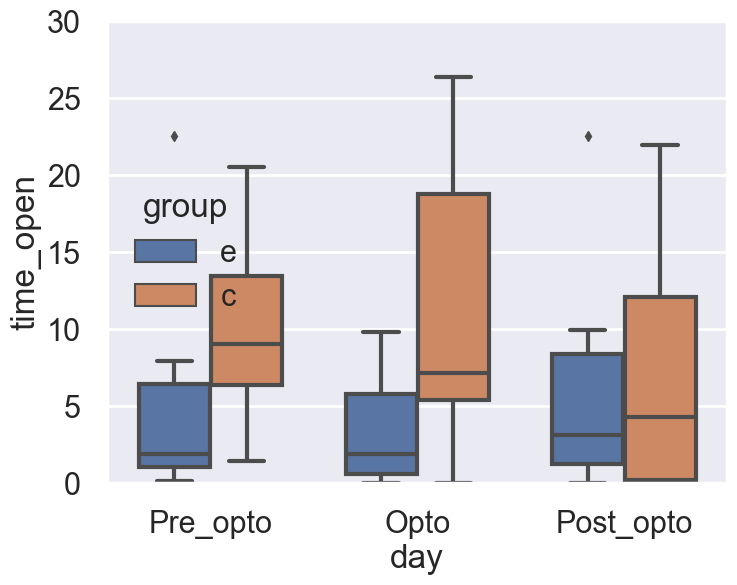

In [155]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "time_open", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 30)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/time_open.svg"
plt.savefig(save_fig_to)
plt.show()

In [156]:
# Time in center
columns_of_feature =  [x for x in column_list if "Time center total_bin" in x]
columns_of_feature = [x for x in columns_of_feature if "[%]" in x]
columns_of_feature

['Time center total_bin1 [%]',
 'Time center total_bin2 [%]',
 'Time center total_bin3 [%]']

In [157]:
exp_total_time_center = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_total_time_center_mean = [mean(x) for x in exp_total_time_center]
exp_total_time_center_sem = [sem(x) for x in exp_total_time_center]
exp_total_time_center_pre_opto, exp_total_time_center_opto, exp_total_time_center_post_opto = exp_total_time_center[0], exp_total_time_center[1], exp_total_time_center[2]

control_total_time_center = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_total_time_center_mean = [mean(x) for x in control_total_time_center]
control_total_time_center_sem = [sem(x) for x in control_total_time_center]
control_total_time_center_pre_opto, control_total_time_center_opto, control_total_time_center_post_opto = control_total_time_center[0], control_total_time_center[1], control_total_time_center[2]

flat_list_exp_time_center = list(np.concatenate(exp_total_time_center).flat)
flat_list_control_time_center = list(np.concatenate(control_total_time_center).flat)
time_center_feature = flat_list_exp_time_center + flat_list_control_time_center
dv_anova["time_center"] = time_center_feature

In [158]:
# Pre_opto 
pt.mwu(exp_total_time_center_pre_opto, control_total_time_center_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,30.0,two-sided,0.775624,-0.111111,0.555556


In [159]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_total_time_center_pre_opto, exp_total_time_center_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,6.0,two-sided,0.4375,0.428571,0.638889


In [160]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_total_time_center_pre_opto, control_total_time_center_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,11.0,two-sided,0.203125,0.511111,0.740741


In [161]:
# Opto
pt.mwu(exp_total_time_center_opto, control_total_time_center_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,39.0,two-sided,0.181019,-0.444444,0.722222


In [162]:
#Post_opto
pt.mwu(exp_total_time_center_post_opto, control_total_time_center_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,37.0,two-sided,0.272128,-0.37037,0.685185


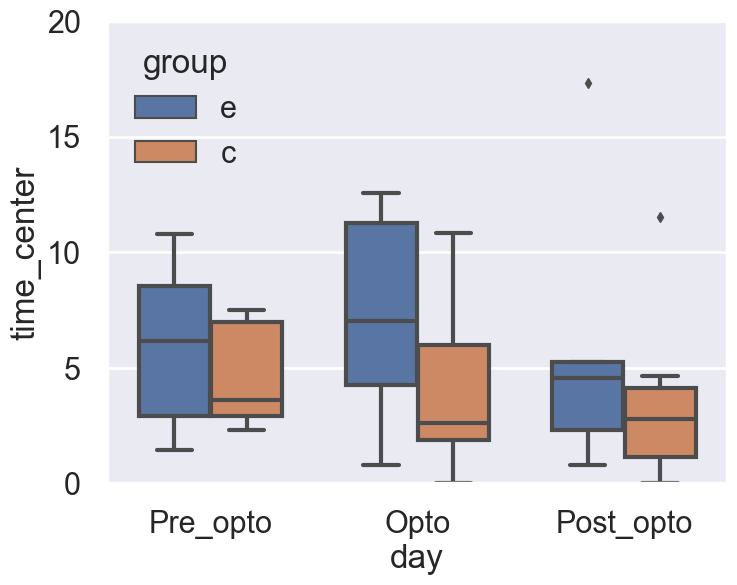

In [163]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "time_center", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 20)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/time_center.svg"
plt.savefig(save_fig_to)
plt.show()

In [164]:
# Distance to edge of EPM
columns_of_feature =  [x for x in column_list if "Min dist open_bin" in x]
columns_of_feature

['Min dist open_bin1 [cm]',
 'Min dist open_bin2 cm]',
 'Min dist open_bin3 [cm]']

In [165]:
exp_min_dist_open = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_min_dist_open_mean = [mean(x) for x in exp_min_dist_open]
exp_min_dist_open_sem = [sem(x) for x in exp_min_dist_open]
exp_min_dist_open_pre_opto, exp_min_dist_open_opto, exp_min_dist_open_post_opto = exp_min_dist_open[0], exp_min_dist_open[1], exp_min_dist_open[2]

control_min_dist_open = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_min_dist_open_mean = [mean(x) for x in control_min_dist_open]
control_min_dist_open_sem = [sem(x) for x in control_min_dist_open]
control_min_dist_open_pre_opto, control_min_dist_open_opto, control_min_dist_open_post_opto = control_min_dist_open[0], control_min_dist_open[1], control_min_dist_open[2]

flat_list_exp_min_dist_open = list(np.concatenate(exp_min_dist_open).flat)
flat_list_control_min_dist_open = list(np.concatenate(control_min_dist_open).flat)
min_dist_open_feature = flat_list_exp_min_dist_open + flat_list_control_min_dist_open
dv_anova["min_dist_open"] = min_dist_open_feature

In [166]:
# Pre_opto 
pt.mwu(exp_min_dist_open_pre_opto, control_min_dist_open_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,32.5,two-sided,0.554982,-0.203704,0.601852


In [167]:
median(exp_min_dist_open_pre_opto)

6.655

In [168]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_min_dist_open_pre_opto, exp_min_dist_open_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,10.0,two-sided,1.0,-0.047619,0.5


In [169]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_min_dist_open_pre_opto, control_min_dist_open_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,14.0,two-sided,0.359375,-0.377778,0.358025


In [170]:
# Opto
pt.mwu(exp_min_dist_open_opto, control_min_dist_open_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,36.0,two-sided,0.327672,-0.333333,0.666667


In [171]:
median(exp_min_dist_open_opto)

10.685

In [172]:
#Post_opto
pt.mwu(exp_min_dist_open_post_opto, control_min_dist_open_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,29.0,two-sided,0.859185,-0.074074,0.537037


In [173]:
median(control_min_dist_open_post_opto)

0.67

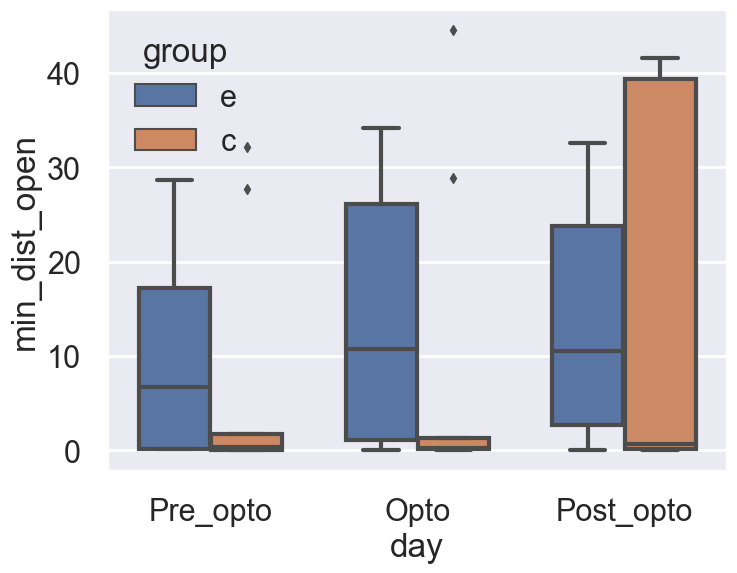

In [174]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "min_dist_open", x = "day", hue = "group", ax=ax, width = 0.7)
#ax.set_ylim(0, 20)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/min_dist_open.svg"
plt.savefig(save_fig_to)
plt.show()

#### Episodes of mobility_open_total

In [175]:
columns_of_feature =  [x for x in column_list if "Episodes of mobility_open_total_bin" in x]
columns_of_feature

['Episodes of mobility_open_total_bin1 [n]',
 'Episodes of mobility_open_total_bin2 [n]',
 'Episodes of mobility_open_total_bin3 [n]']

In [176]:
exp_episodes_mobility_open = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_episodes_mobility_open_mean = [mean(x) for x in exp_episodes_mobility_open]
exp_episodes_mobility_open_sem = [sem(x) for x in exp_episodes_mobility_open]
exp_episodes_mobility_open_pre_opto, exp_episodes_mobility_open_opto, exp_episodes_mobility_open_post_opto = exp_episodes_mobility_open[0], exp_episodes_mobility_open[1], exp_episodes_mobility_open[2]

control_episodes_mobility_open = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_episodes_mobility_open_mean = [mean(x) for x in control_episodes_mobility_open]
control_episodes_mobility_open_sem = [sem(x) for x in control_episodes_mobility_open]
control_episodes_mobility_open_pre_opto, control_episodes_mobility_open_opto, control_episodes_mobility_open_post_opto = control_episodes_mobility_open[0], control_episodes_mobility_open[1], control_episodes_mobility_open[2]

flat_list_exp_episodes_mobility_open = list(np.concatenate(exp_episodes_mobility_open).flat)
flat_list_control_episodes_mobility_open = list(np.concatenate(control_episodes_mobility_open).flat)
episodes_mobility_open_feature = flat_list_exp_episodes_mobility_open + flat_list_control_episodes_mobility_open
dv_anova["episodes_mobility_open"] = episodes_mobility_open_feature

In [177]:
# Pre_opto 
pt.mwu(exp_episodes_mobility_open_pre_opto, control_episodes_mobility_open_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,19.0,two-sided,0.374187,0.296296,0.351852


In [178]:
median(exp_episodes_mobility_open_pre_opto)

1.5

In [179]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_episodes_mobility_open_pre_opto, exp_episodes_mobility_open_post_opto, alternative='two-sided')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,2.0,two-sided,0.36131,0.6,0.611111


In [180]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_episodes_mobility_open_pre_opto, control_episodes_mobility_open_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,13.5,two-sided,0.359375,0.4,0.623457


In [181]:
# Opto
pt.mwu(exp_episodes_mobility_open_opto, control_episodes_mobility_open_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,12.0,two-sided,0.08437,0.555556,0.222222


In [182]:
median(exp_episodes_mobility_open_opto)

1.0

In [183]:
#Post_opto
pt.mwu(exp_episodes_mobility_open_post_opto, control_episodes_mobility_open_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,22.5,two-sided,0.625695,0.166667,0.416667


In [184]:
median(exp_episodes_mobility_open_post_opto)

1.0

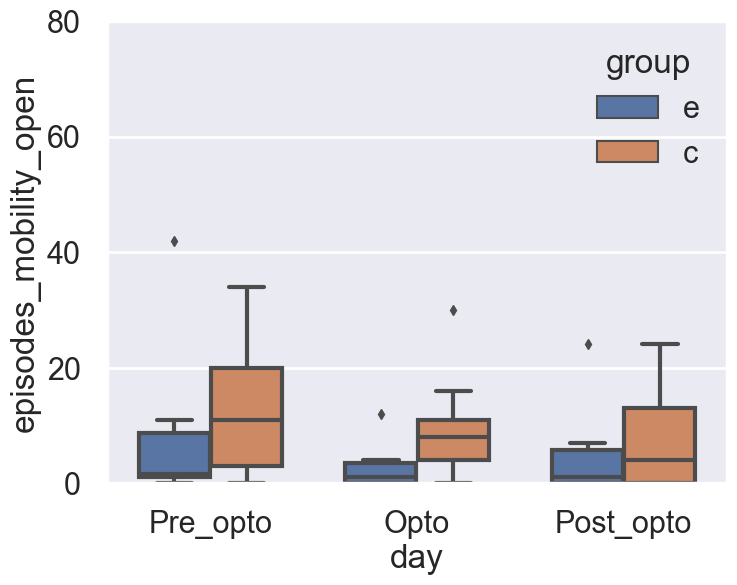

In [185]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "episodes_mobility_open", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 80)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/episodes_mobility_open.svg"
plt.savefig(save_fig_to)
plt.show()

#### Episodes of mobility_close_total

In [262]:
columns_of_feature =  [x for x in column_list if "Episodes of mobility_close_total_bin" in x]
columns_of_feature

['Episodes of mobility_close_total_bin1 [n]',
 'Episodes of mobility_close_total_bin2 [n]',
 'Episodes of mobility_close_total_bin3 [n]']

In [263]:
exp_episodes_mobility_close = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_episodes_mobility_close_mean = [mean(x) for x in exp_episodes_mobility_close]
exp_episodes_mobility_close_sem = [sem(x) for x in exp_episodes_mobility_close]
exp_episodes_mobility_close_pre_opto, exp_episodes_mobility_close_opto, exp_episodes_mobility_close_post_opto = exp_episodes_mobility_close[0], exp_episodes_mobility_close[1], exp_episodes_mobility_close[2]

control_episodes_mobility_close = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_episodes_mobility_close_mean = [mean(x) for x in control_episodes_mobility_open]
control_episodes_mobility_close_sem = [sem(x) for x in control_episodes_mobility_open]
control_episodes_mobility_close_pre_opto, control_episodes_mobility_close_opto, control_episodes_mobility_close_post_opto = control_episodes_mobility_close[0], control_episodes_mobility_close[1], control_episodes_mobility_close[2]

flat_list_exp_episodes_mobility_close = list(np.concatenate(exp_episodes_mobility_close).flat)
flat_list_control_episodes_mobility_close = list(np.concatenate(control_episodes_mobility_close).flat)
episodes_mobility_close_feature = flat_list_exp_episodes_mobility_close + flat_list_control_episodes_mobility_close
dv_anova["episodes_mobility_close"] = episodes_mobility_close_feature

In [265]:
# Pre_opto 
pt.mwu(exp_episodes_mobility_close_pre_opto, control_episodes_mobility_close_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,29.5,two-sided,0.813172,-0.092593,0.546296


In [267]:
median(exp_episodes_mobility_close_pre_opto)

61.5

In [189]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_episodes_mobility_close_pre_opto, exp_episodes_mobility_close_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.03125,1.0,0.902778


In [190]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_episodes_mobility_close_pre_opto, control_episodes_mobility_close_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.993827


In [191]:
# Opto
pt.mwu(exp_episodes_mobility_close_opto, control_episodes_mobility_close_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,26.5,two-sided,1.0,0.018519,0.490741


In [269]:
median(exp_episodes_mobility_close_opto)

29.5

In [192]:
#Post_opto
pt.mwu(exp_episodes_mobility_close_post_opto, control_episodes_mobility_close_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,27.0,two-sided,1.0,0.0,0.5


In [271]:
median(exp_episodes_mobility_close_post_opto)

18.0

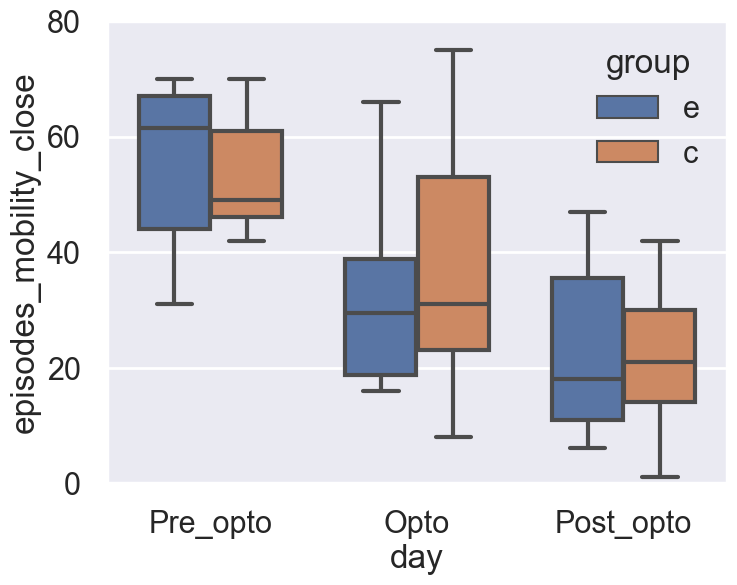

In [193]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "episodes_mobility_close", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 80)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/episodes_mobility_close.svg"
plt.savefig(save_fig_to)
plt.show()

#### Episodes of mobility_total

In [251]:
exp_episodes_mobility_pre_opto = [sum(x) for x in zip(exp_episodes_mobility_close_pre_opto, exp_episodes_mobility_open_pre_opto)]
exp_episodes_mobility_opto =  [sum(x) for x in zip(exp_episodes_mobility_close_opto, exp_episodes_mobility_open_opto)]
exp_episodes_mobility_post_opto =  [sum(x) for x in zip(exp_episodes_mobility_close_post_opto, exp_episodes_mobility_open_post_opto)] 
control_episodes_mobility_pre_opto = [sum(x) for x in zip(control_episodes_mobility_close_pre_opto, control_episodes_mobility_open_pre_opto)]
control_episodes_mobility_opto = [sum(x) for x in zip(control_episodes_mobility_close_opto, control_episodes_mobility_open_opto)]
control_episodes_mobility_post_opto = [sum(x) for x in zip(control_episodes_mobility_close_post_opto, control_episodes_mobility_open_post_opto)]

flat_list_exp_episodes_mobility = exp_episodes_mobility_pre_opto + exp_episodes_mobility_opto + exp_episodes_mobility_post_opto
flat_list_control_episodes_mobility = control_episodes_mobility_pre_opto + control_episodes_mobility_opto + control_episodes_mobility_post_opto
episodes_mobility_feature = flat_list_exp_episodes_mobility + flat_list_control_episodes_mobility
dv_anova["episodes_mobility"] = episodes_mobility_feature

In [252]:
#Check normality
#pt.normality(exp_episodes_mobility_pre_opto)
#pt.normality(exp_episodes_mobility_opto)
#pt.normality(exp_episodes_mobility_post_opto)
#pt.normality(control_episodes_mobility_pre_opto)
#pt.normality(control_episodes_mobility_opto)
#pt.normality(control_episodes_mobility_post_opto)

In [253]:
# Pre_opto 
pt.mwu(exp_episodes_mobility_pre_opto, control_episodes_mobility_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,28.5,two-sided,0.905169,-0.055556,0.527778


In [255]:
median(exp_episodes_mobility_pre_opto)

69.5

In [197]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_episodes_mobility_pre_opto, exp_episodes_mobility_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.03125,1.0,0.972222


In [198]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_episodes_mobility_pre_opto, control_episodes_mobility_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.975309


In [258]:
# Opto
pt.mwu(exp_episodes_mobility_opto, control_episodes_mobility_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,18.5,two-sided,0.345348,0.314815,0.342593


In [257]:
median(exp_episodes_mobility_opto)

33.0

In [259]:
#Post_opto
pt.mwu(exp_episodes_mobility_post_opto, control_episodes_mobility_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,27.0,two-sided,1.0,0.0,0.5


In [261]:
median(exp_episodes_mobility_post_opto)

31.0

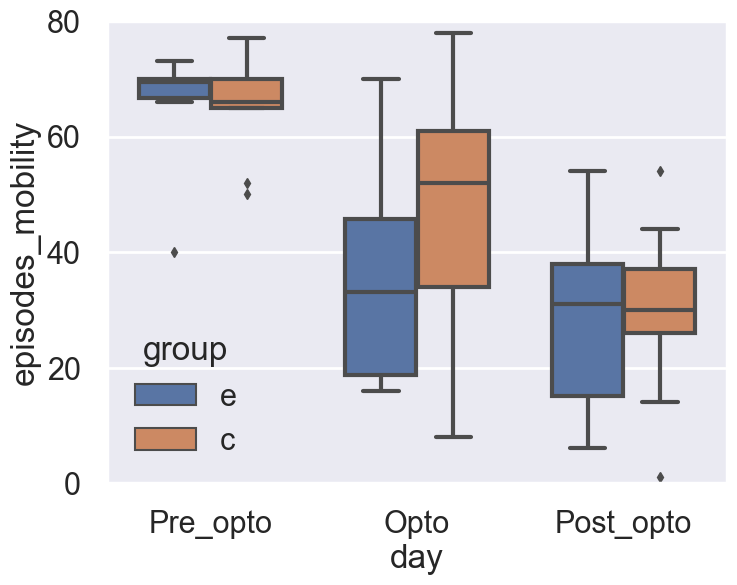

In [201]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova,y= "episodes_mobility", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 80)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/episodes_mobility.svg"
plt.savefig(save_fig_to)
plt.show()

#### Velocity mobility

In [202]:
# total
columns_of_feature =  [x for x in column_list if "Velocity mobility_total_bin" in x]
columns_of_feature

['Velocity mobility_total_bin1 [cm/s]',
 'Velocity mobility_total_bin2 [cm/s]',
 'Velocity mobility_total_bin3 [cm/s]']

In [203]:
exp_velocity_mobility_total = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_velocity_mobility_total_mean = [mean(x) for x in exp_velocity_mobility_total]
exp_velocity_mobility_total_sem = [sem(x) for x in exp_velocity_mobility_total]
exp_velocity_mobility_total_pre_opto, exp_velocity_mobility_total_opto, exp_velocity_mobility_total_post_opto = exp_velocity_mobility_total[0], exp_velocity_mobility_total[1], exp_velocity_mobility_total[2]

control_velocity_mobility_total = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_velocity_mobility_total_mean = [mean(x) for x in control_velocity_mobility_total]
control_velocity_mobility_total_sem = [sem(x) for x in control_velocity_mobility_total]
control_velocity_mobility_total_pre_opto, control_velocity_mobility_total_opto, control_velocity_mobility_total_post_opto = control_velocity_mobility_total[0], control_velocity_mobility_total[1], control_velocity_mobility_total[2]

flat_list_exp_velocity_mobility_total = list(np.concatenate(exp_velocity_mobility_total).flat)
flat_list_control_velocity_mobility_total = list(np.concatenate(control_velocity_mobility_total).flat)
velocity_mobility_total_feature = flat_list_exp_velocity_mobility_total + flat_list_control_velocity_mobility_total
dv_anova["velocity_mobility_total"] = velocity_mobility_total_feature

In [204]:
# Pre_opto 
pt.mwu(exp_velocity_mobility_total_pre_opto, control_velocity_mobility_total_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,16.0,two-sided,0.215515,0.407407,0.296296


In [205]:
median(exp_velocity_mobility_total_pre_opto)

15.3

In [206]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_velocity_mobility_total_pre_opto, exp_velocity_mobility_total_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.03125,1.0,0.861111


In [207]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_velocity_mobility_total_pre_opto, control_velocity_mobility_total_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,2.0,two-sided,0.011719,0.911111,0.82716


In [208]:
# Opto
pt.mwu(exp_velocity_mobility_total_opto, control_velocity_mobility_total_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,6.0,two-sided,0.011988,0.777778,0.111111


In [209]:
median(exp_velocity_mobility_total_opto)

13.42

In [210]:
#Post_opto
pt.mwu(exp_velocity_mobility_total_post_opto, control_velocity_mobility_total_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,21.0,two-sided,0.528671,0.222222,0.388889


In [211]:
median(exp_velocity_mobility_total_post_opto)

13.254999999999999

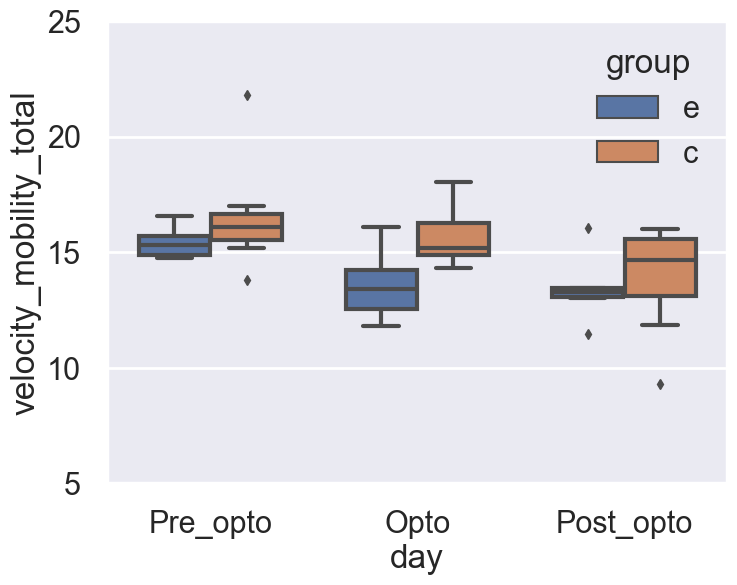

In [212]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova, y= "velocity_mobility_total", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(5, 25)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/velocity_mobility_total.svg"
plt.savefig(save_fig_to)
plt.show()

In [272]:
# close
columns_of_feature =  [x for x in column_list if "Velocity mobility_total_close_bin" in x]
columns_of_feature

['Velocity mobility_total_close_bin1 [cm/s]',
 'Velocity mobility_total_close_bin2 [cm/s]',
 'Velocity mobility_total_close_bin3 [cm/s]']

In [273]:
exp_velocity_mobility_close = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_velocity_mobility_close_mean = [mean(x) for x in exp_velocity_mobility_close]
exp_velocity_mobility_close_sem = [sem(x) for x in exp_velocity_mobility_close]
exp_velocity_mobility_close_pre_opto, exp_velocity_mobility_close_opto, exp_velocity_mobility_close_post_opto = exp_velocity_mobility_close[0], exp_velocity_mobility_close[1], exp_velocity_mobility_close[2]

control_velocity_mobility_close = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_velocity_mobility_close_mean = [mean(x) for x in control_velocity_mobility_close]
control_velocity_mobility_close_sem = [sem(x) for x in control_velocity_mobility_close]
control_velocity_mobility_close_pre_opto, control_velocity_mobility_close_opto, control_velocity_mobility_close_post_opto = control_velocity_mobility_close[0], control_velocity_mobility_close[1], control_velocity_mobility_close[2]

flat_list_exp_velocity_mobility_close = list(np.concatenate(exp_velocity_mobility_close).flat)
flat_list_control_velocity_mobility_close = list(np.concatenate(control_velocity_mobility_close).flat)
velocity_mobility_close_feature = flat_list_exp_velocity_mobility_close + flat_list_control_velocity_mobility_close
dv_anova["velocity_mobility_close"] = velocity_mobility_close_feature

In [276]:
# Pre_opto 
pt.mwu(exp_velocity_mobility_close_pre_opto, control_velocity_mobility_close_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,19.0,two-sided,0.388412,0.296296,0.351852


In [278]:
median(exp_velocity_mobility_close_pre_opto)

15.815000000000001

In [275]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_velocity_mobility_close_pre_opto, exp_velocity_mobility_close_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.03125,1.0,0.888889


In [217]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_velocity_mobility_close_pre_opto, control_velocity_mobility_close_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,7.0,two-sided,0.074219,0.688889,0.802469


In [218]:
# Opto
pt.mwu(exp_velocity_mobility_close_opto, control_velocity_mobility_close_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,8.0,two-sided,0.025574,0.703704,0.148148


In [280]:
median(exp_velocity_mobility_close_opto)

13.08

In [219]:
#Post_opto
pt.mwu(exp_velocity_mobility_close_post_opto, control_velocity_mobility_close_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,17.0,two-sided,0.272128,0.37037,0.314815


In [283]:
median(exp_velocity_mobility_close_post_opto)

13.115

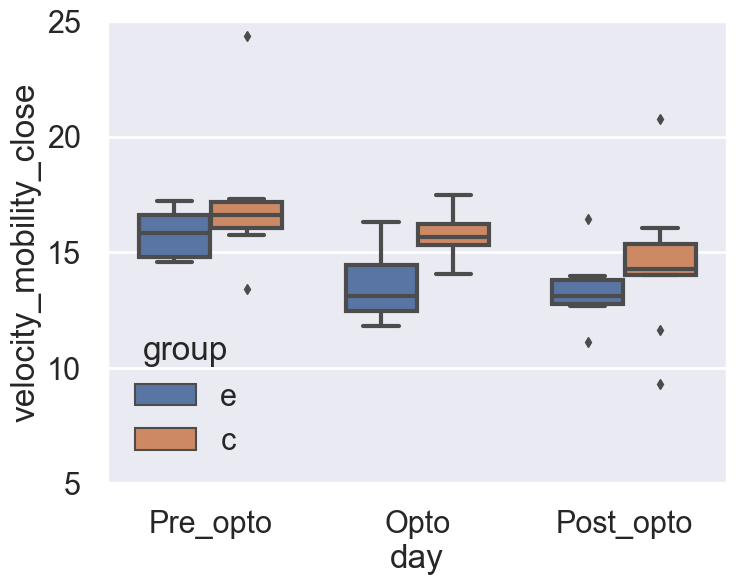

In [220]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova, y= "velocity_mobility_close", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(5, 25)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/velocity_mobility_close.svg"
plt.savefig(save_fig_to)
plt.show()

#### Distance mobility_total

In [221]:
columns_of_feature =  [x for x in column_list if "Distance mobility_total_bin" in x]
columns_of_feature

['Distance mobility_total_bin1 [cm]',
 'Distance mobility_total_bin2 [cm]',
 'Distance mobility_total_bin3 [cm]']

In [222]:
exp_distance_mobility_total = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_distance_mobility_total_mean = [mean(x) for x in exp_distance_mobility_total]
exp_distance_mobility_total_sem = [sem(x) for x in exp_distance_mobility_total]
exp_distance_mobility_total_pre_opto, exp_distance_mobility_total_opto, exp_distance_mobility_total_post_opto = exp_distance_mobility_total[0], exp_distance_mobility_total[1], exp_distance_mobility_total[2]

control_distance_mobility_total = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_distance_mobility_total_mean = [mean(x) for x in control_distance_mobility_total]
control_distance_mobility_total_sem = [sem(x) for x in control_distance_mobility_total]
control_distance_mobility_total_pre_opto, control_distance_mobility_total_opto, control_distance_mobility_total_post_opto = control_distance_mobility_total[0], control_distance_mobility_total[1], control_distance_mobility_total[2]

flat_list_exp_distance_mobility_total = list(np.concatenate(exp_distance_mobility_total).flat)
flat_list_control_distance_mobility_total = list(np.concatenate(control_distance_mobility_total).flat)
distance_mobility_total_feature = flat_list_exp_distance_mobility_total + flat_list_control_distance_mobility_total
dv_anova["distance_mobility_total"] = distance_mobility_total_feature

In [223]:
# Pre_opto 
pt.mwu(exp_distance_mobility_total_pre_opto, control_distance_mobility_total_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,26.0,two-sided,0.954645,0.037037,0.481481


In [230]:
median(exp_distance_mobility_total_pre_opto)

1403.435

In [224]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_distance_mobility_total_pre_opto, exp_distance_mobility_total_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1.0,two-sided,0.0625,0.904762,0.861111


In [225]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_distance_mobility_total_pre_opto, control_distance_mobility_total_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.003906,1.0,0.962963


In [226]:
# Opto
pt.mwu(exp_distance_mobility_total_opto, control_distance_mobility_total_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.0,two-sided,0.455944,0.259259,0.37037


In [234]:
median(exp_distance_mobility_total_opto)

572.105

In [227]:
#Post_opto
pt.mwu(exp_distance_mobility_total_post_opto, control_distance_mobility_total_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,27.0,two-sided,1.0,0.0,0.5


In [239]:
median(exp_distance_mobility_total_post_opto)

554.895

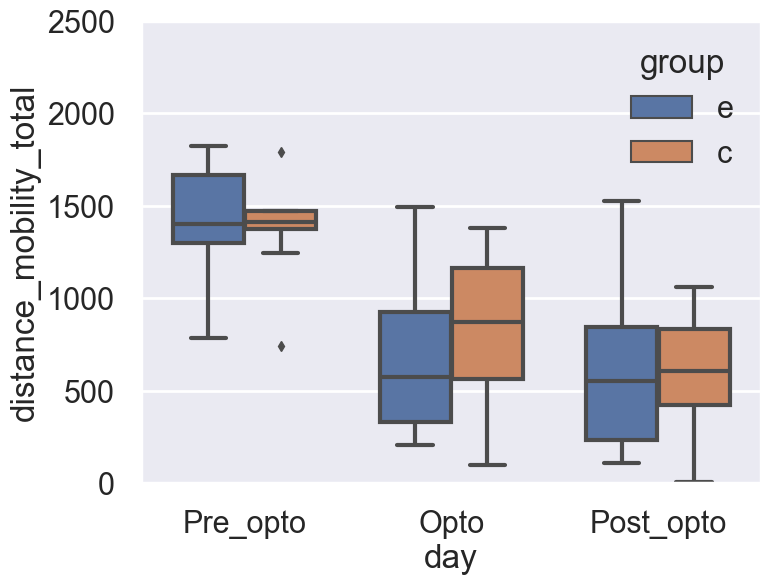

In [240]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim(0, 2500)
sns.boxplot(data = dv_anova, y= "distance_mobility_total", x = "day", hue = "group", ax=ax, width = 0.7)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/distance_mobility_total.svg"
plt.savefig(save_fig_to)
plt.show()

#### Distance mobility_total_open_bin

In [248]:
columns_of_feature =  [x for x in column_list if "Distance mobility_total_open_bin" in x]
columns_of_feature

['Distance mobility_total_open_bin1 [cm]',
 'Distance mobility_total_open_bin2 [cm]',
 'Distance mobility_total_open_bin3 [cm]']

In [249]:
exp_distance_mobility_total_open = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_distance_mobility_total_open_mean = [mean(x) for x in exp_distance_mobility_total_open]
exp_distance_mobility_total_open_sem = [sem(x) for x in exp_distance_mobility_total_open]
exp_distance_mobility_total_open_pre_opto, exp_distance_mobility_total_open_opto, exp_distance_mobility_total_open_post_opto = exp_distance_mobility_total_open[0], exp_distance_mobility_total_open[1], exp_distance_mobility_total_open[2]

control_distance_mobility_total_open = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_distance_mobility_total_open_mean = [mean(x) for x in control_distance_mobility_total_open]
control_distance_mobility_total_open_sem = [sem(x) for x in control_distance_mobility_total_open]
control_distance_mobility_total_open_pre_opto, control_distance_mobility_total_open_opto, control_distance_mobility_total_open_post_opto = control_distance_mobility_total_open[0], control_distance_mobility_total_open[1], control_distance_mobility_total_open[2]

flat_list_exp_distance_mobility_total_open = list(np.concatenate(exp_distance_mobility_total_open).flat)
flat_list_control_distance_mobility_total_open = list(np.concatenate(control_distance_mobility_total_open).flat)
distance_mobility_total_open_feature = flat_list_exp_distance_mobility_total_open + flat_list_control_distance_mobility_total_open
dv_anova["distance_mobility_total_open"] = distance_mobility_total_open_feature

In [250]:
# Pre_opto 
pt.mwu(exp_distance_mobility_total_open_pre_opto, control_distance_mobility_total_open_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,21.5,two-sided,0.555336,0.203704,0.398148


In [94]:
median(exp_distance_mobility_total_open_pre_opto)

36.260000000000005

In [95]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_distance_mobility_total_open_pre_opto, exp_distance_mobility_total_open_post_opto, alternative='two-sided')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,3.0,two-sided,0.280713,0.6,0.680556


In [96]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_distance_mobility_total_open_pre_opto, control_distance_mobility_total_open_post_opto, alternative='two-sided')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,14.0,two-sided,0.359375,0.377778,0.635802


In [97]:
# Opto note: -> MAYBE TREND !!!!!!!!!!!!!!!!!!!!!!
pt.mwu(exp_distance_mobility_total_open_opto, control_distance_mobility_total_open_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,11.5,two-sided,0.074462,0.574074,0.212963


In [98]:
median(exp_distance_mobility_total_open_opto)

17.925

In [99]:
#Post_opto
pt.mwu(exp_distance_mobility_total_open_post_opto, control_distance_mobility_total_open_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,20.5,two-sided,0.465209,0.240741,0.37963


In [237]:
median(exp_distance_mobility_total_open_post_opto)

3.935

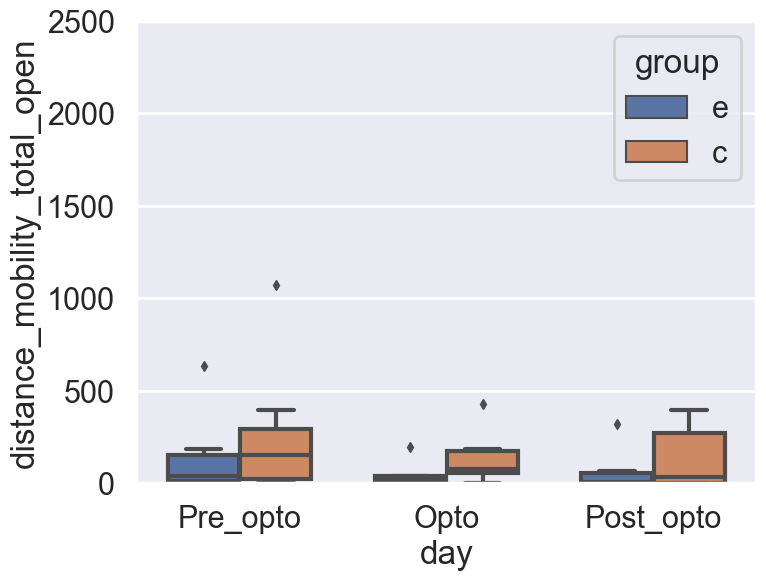

In [101]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova, y= "distance_mobility_total_open", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 2500)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/distance_mobility_total_open.svg"
plt.savefig(save_fig_to)
plt.show()

#### Distance mobility_total_close_bin

In [245]:
columns_of_feature =  [x for x in column_list if "Distance mobility_total_close_bin" in x]
columns_of_feature

['Distance mobility_total_close_bin1 [cm]',
 'Distance mobility_total_close_bin2 [cm]',
 'Distance mobility_total_close_bin3 [cm]']

In [246]:
exp_distance_mobility_total_close = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_distance_mobility_total_close_mean = [mean(x) for x in exp_distance_mobility_total_close]
exp_distance_mobility_total_close_sem = [sem(x) for x in exp_distance_mobility_total_close]
exp_distance_mobility_total_close_pre_opto, exp_distance_mobility_total_close_opto, exp_distance_mobility_total_close_post_opto = exp_distance_mobility_total_close[0], exp_distance_mobility_total_close[1], exp_distance_mobility_total_close[2]

control_distance_mobility_total_close = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_distance_mobility_total_close_mean = [mean(x) for x in control_distance_mobility_total_close]
control_distance_mobility_total_close_sem = [sem(x) for x in control_distance_mobility_total_close]
control_distance_mobility_total_close_pre_opto, control_distance_mobility_total_close_opto, control_distance_mobility_total_close_post_opto = control_distance_mobility_total_close[0], control_distance_mobility_total_close[1], control_distance_mobility_total_close[2]

flat_list_exp_distance_mobility_total_close = list(np.concatenate(exp_distance_mobility_total_close).flat)
flat_list_control_distance_mobility_total_close = list(np.concatenate(control_distance_mobility_total_close).flat)
distance_mobility_total_close_feature = flat_list_exp_distance_mobility_total_close + flat_list_control_distance_mobility_total_close
dv_anova["distance_mobility_total_close"] = distance_mobility_total_close_feature

In [247]:
pt.mixed_anova(data=dv_anova, dv="distance_mobility_total_close", between="group", within="day", subject='subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,4.299886e+02,1,13,4.299886e+02,0.001685,9.678802e-01,0.000130,NaN
1,day,3.074500e+06,2,26,1.537250e+06,52.762985,7.038884e-10,0.802320,0.953518
2,Interaction,4.248331e+04,2,26,2.124166e+04,0.729077,4.919560e-01,0.053105,NaN


C:\Users\gniew\AppData\Local\Temp\ipykernel_20492\3409222037.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


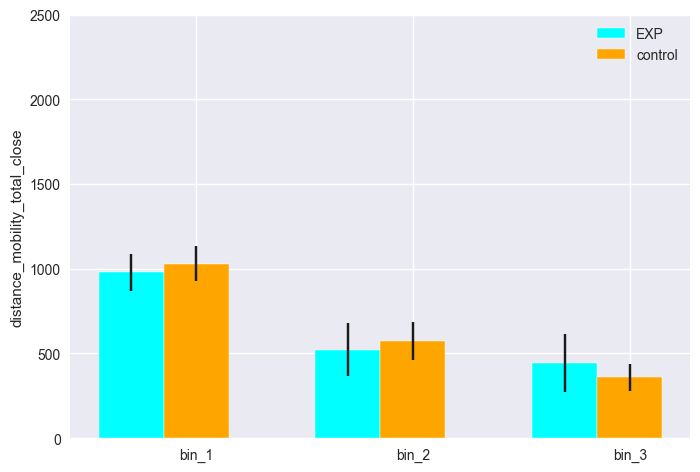

In [105]:
#  Graph
plt.style.use("seaborn")
x = np.arange(3)
day_list = ["bin_1", "bin_2", "bin_3"]
width = 0.3
plt.bar(x -0.3, exp_distance_mobility_total_close_mean, width, color='cyan', yerr = exp_distance_mobility_total_close_sem)
plt.bar(x, control_distance_mobility_total_close_mean, width, color='orange', yerr = control_distance_mobility_total_close_sem)
plt.xticks(x, day_list)
plt.ylabel("distance_mobility_total_close")
plt.legend(["EXP", "control"])
plt.ylim(0, 2500)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/distance_mobility_total_close.svg"
plt.savefig(save_fig_to)
plt.show()

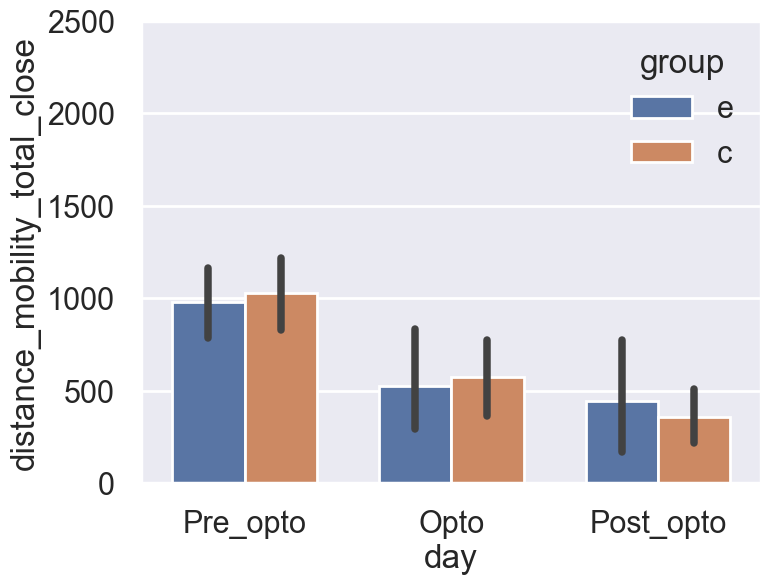

In [106]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data = dv_anova, y= "distance_mobility_total_close", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 2500)
#save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/distance_mobility_total_open.svg"
#plt.savefig(save_fig_to)
plt.show()

#### Entry_open_total_bin

In [107]:
columns_of_feature =  [x for x in column_list if "Entry_open_total_bin" in x]
columns_of_feature

['Entry_open_total_bin1', 'Entry_open_total_bin2', 'Entry_open_total_bin3']

In [108]:
exp_entry_open_total = [df.loc[df["group"] == "e", x].tolist() for x in columns_of_feature]
exp_entry_open_total_mean = [mean(x) for x in exp_entry_open_total]
exp_entry_open_total_sem = [sem(x) for x in exp_entry_open_total]
exp_entry_open_total_pre_opto, exp_entry_open_total_opto, exp_entry_open_total_post_opto = exp_entry_open_total[0], exp_entry_open_total[1], exp_entry_open_total[2]

control_entry_open_total = [df.loc[df["group"] == "c", x].tolist() for x in columns_of_feature]
control_entry_open_total_mean = [mean(x) for x in control_entry_open_total]
control_entry_open_total_sem = [sem(x) for x in control_entry_open_total]
control_entry_open_total_pre_opto, control_entry_open_total_opto, control_entry_open_total_post_opto = control_entry_open_total[0], control_entry_open_total[1], control_entry_open_total[2]

flat_list_exp_entry_open_total = list(np.concatenate(exp_entry_open_total).flat)
flat_list_control_entry_open_total = list(np.concatenate(control_entry_open_total).flat)
entry_open_total_feature = flat_list_exp_entry_open_total + flat_list_control_entry_open_total
dv_anova["entry_open_total"] = entry_open_total_feature

In [109]:
# Pre_opto 
pt.mwu(exp_entry_open_total_pre_opto, control_entry_open_total_pre_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,19.5,two-sided,0.403885,0.277778,0.361111


In [110]:
median(exp_entry_open_total_pre_opto)

3.0

In [111]:
# Pre_opto vs Post_opto
pt.wilcoxon(exp_entry_open_total_pre_opto, exp_entry_open_total_post_opto, alternative='two-sided')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,4.0,two-sided,0.418492,0.466667,0.722222


In [112]:
# Pre_opto vs Post_opto
pt.wilcoxon(control_entry_open_total_pre_opto, control_entry_open_total_post_opto, alternative='two-sided')

C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\gniew\anaconda3\envs\WORK\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1.5,two-sided,0.024707,0.916667,0.728395


In [113]:
# Opto
pt.mwu(exp_entry_open_total_opto, control_entry_open_total_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,16.5,two-sided,0.23522,0.388889,0.305556


In [114]:
median(exp_entry_open_total_opto)

1.5

In [115]:
#Post_opto
pt.mwu(exp_entry_open_total_post_opto, control_entry_open_total_post_opto, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,27.0,two-sided,1.0,0.0,0.5


In [116]:
median(exp_entry_open_total_post_opto)

1.5

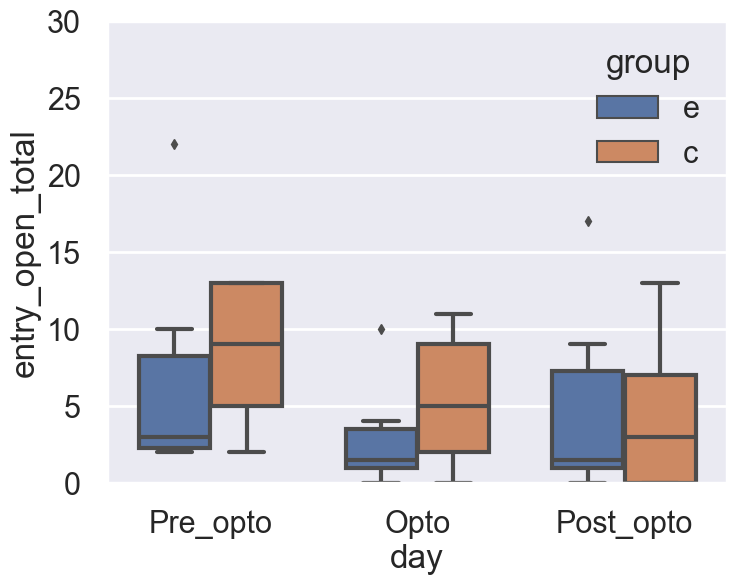

In [117]:
#Graph
sns.set_theme(context='poster')
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data = dv_anova, y= "entry_open_total", x = "day", hue = "group", ax=ax, width = 0.7)
ax.set_ylim(0, 30)
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/entry_open_total.svg"
plt.savefig(save_fig_to)
plt.show()

In [118]:
df = easygui.fileopenbox(title="Select a file", filetypes= None, multiple=True)

In [119]:
df_gen_back = (pd.read_excel(i) for i in df)

In [120]:
results = pd.DataFrame(columns = ["rat", "Bin", "sum_backward [s]"])
for index, data_frame in enumerate(df_gen_back):
    sum_backward = float(data_frame.loc[(data_frame["Time [s]"] >= 1.5) & (data_frame["Bin"] == "bin_1"), "Time [s]"].sum())
    rat_ = data_frame["Rat_id"].unique()[0]
    bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_1"].unique()[0]
    results.loc[index] = [rat_, bin_, sum_backward]
df_gen_back = (pd.read_excel(i) for i in df)
for index, data_frame in enumerate(df_gen_back):
    sum_backward = float(data_frame.loc[(data_frame["Time [s]"] >= 1.5) & (data_frame["Bin"] == "bin_2"), "Time [s]"].sum())
    rat_ = data_frame["Rat_id"].unique()[0]
    bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_2"].unique()[0]
    results.loc[index+ 15] = [rat_, bin_, sum_backward]
df_gen_back = (pd.read_excel(i) for i in df)
for index, data_frame in enumerate(df_gen_back):
    sum_backward = float(data_frame.loc[(data_frame["Time [s]"] >= 1.5) & (data_frame["Bin"] == "bin_3"), "Time [s]"].sum())
    rat_ = data_frame["Rat_id"].unique()[0]
    bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_3"].unique()[0]
    results.loc[index + 30] = [rat_, bin_, sum_backward]
    
print(results)

                        rat    Bin  sum_backward [s]
0         rat1_ctrl_kohEDLC  bin_1             10.32
1         rat2_ctrl_kohEDLC  bin_1             14.39
2         rat5_ctrl_kohEDLC  bin_1              3.45
3         rat5_ctrl_kohFDLC  bin_1             14.69
4         rat6_ctrl_kohFDLC  bin_1             13.53
5   zw1_control_kohAprimDLC  bin_1             17.05
6           zw1_exp_kohCDLC  bin_1              3.55
7          zw2_ctrl_kohCDLC  bin_1             12.06
8          zw3_ctrl_kohCDLC  bin_1             39.57
9           zw4_exp_kohCDLC  bin_1             15.05
10         zw6_ctrl_kohDDLC  bin_1             25.05
11      zw7_exp_kohAprimDLC  bin_1             10.93
12          zw7_exp_kohDDLC  bin_1             25.09
13     zw11_exp_kohAprimDLC  bin_1              5.32
14     zw12_exp_kohAprimDLC  bin_1              5.90
15        rat1_ctrl_kohEDLC  bin_2              8.31
16        rat2_ctrl_kohEDLC  bin_2             29.79
17        rat5_ctrl_kohEDLC  bin_2            

In [121]:
group_ = ["exp" if "exp" in i else "ctrl" for i in results["rat"] ]
results["group"] = group_

In [122]:
# Check normality
#ctrl_group = pt.normality(df.loc[df["grupa"] == "c", i]).values.tolist()
#ctrl_group = list(itertools.chain(*ctrl_group))
#pt.normality(results.loc[(results["Bin"] == "bin_1") & (results["group"] == "ctrl"), "sum_backward [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_1") & (results["group"] == "exp"), "sum_backward [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_2") & (results["group"] == "ctrl"), "sum_backward [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_2") & (results["group"] == "exp"), "sum_backward [s]"])
pt.normality(results.loc[(results["Bin"] == "bin_3") & (results["group"] == "ctrl"), "sum_backward [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_3") & (results["group"] == "exp"), "sum_backward [s]"])

,W,pval,normal
sum_backward [s],0.85755,0.090167,True


In [123]:
dv_anova

,group,day,subject,time_open,time_center,min_dist_open,episodes_mobility_open,episodes_mobility_close,episodes_mobility,velocity_mobility_total,velocity_mobility_close,distance_mobility_total_open,distance_mobility_total_close,entry_open_total
0,e,Pre_opto,1,1.89,6.93,13.05,1,68,69,16.58,16.70,10.33,1235.09,3
1,e,Pre_opto,2,0.16,5.39,28.62,0,70,70,14.74,14.58,0.00,990.57,2
2,e,Pre_opto,3,1.90,1.43,18.64,1,39,40,14.74,14.62,19.75,654.40,3
3,e,Pre_opto,4,0.80,2.09,0.26,2,64,66,15.33,15.37,52.77,1046.03,2
4,e,Pre_opto,5,7.92,9.05,0.13,11,59,70,15.27,16.26,184.91,1262.54,10
5,e,Pre_opto,6,22.54,10.79,0.09,42,31,73,15.81,17.22,630.61,678.58,22
6,e,Opto,1,6.77,8.19,0.45,4,66,70,16.09,16.28,38.08,1221.77,4
7,e,Opto,2,0.00,5.87,34.15,0,16,16,11.81,11.79,0.00,154.89,0
8,e,Opto,3,0.48,0.79,28.73,0,17,17,14.19,13.65,0.00,267.35,1
9,e,Opto,4,0.96,3.69,18.30,0,24,24,12.52,12.41,0.00,320.96,1


In [124]:
exp = results.loc[results["group"] == "exp", "sum_backward [s]"].values.tolist()
ctrl = results.loc[results["group"] == "ctrl", "sum_backward [s]"].values.tolist()
day_list = ["bin_1", "bin_2", "bin_3"]
sum_back = exp + ctrl
dv_anova["sum_back"] = sum_back
sum_back_mean_exp = [results.loc[(results["Bin"] == i) & (results["group"] == "exp"), "sum_backward [s]"].mean() for i in day_list]
sum_back_mean_ctrl = [results.loc[(results["Bin"] == j) & (results["group"] == "ctrl"), "sum_backward [s]"].mean() for j in day_list]

sum_back_sem_exp = [results.loc[(results["Bin"] == i) & (results["group"] == "exp"), "sum_backward [s]"].sem() for i in day_list]
sum_back_sem_ctrl = [results.loc[(results["Bin"] == j) & (results["group"] == "ctrl"), "sum_backward [s]"].sem() for j in day_list]


In [125]:
pt.mixed_anova(data=dv_anova, dv="sum_back", between="group", within="day", subject='subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,264.884463,1,13,264.884463,2.043489,0.176448,0.135839,NaN
1,day,640.052138,2,26,320.026069,10.445057,0.000468,0.445512,0.78746
2,Interaction,23.417947,2,26,11.708974,0.382159,0.686156,0.028557,NaN


C:\Users\gniew\AppData\Local\Temp\ipykernel_20492\3915471740.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


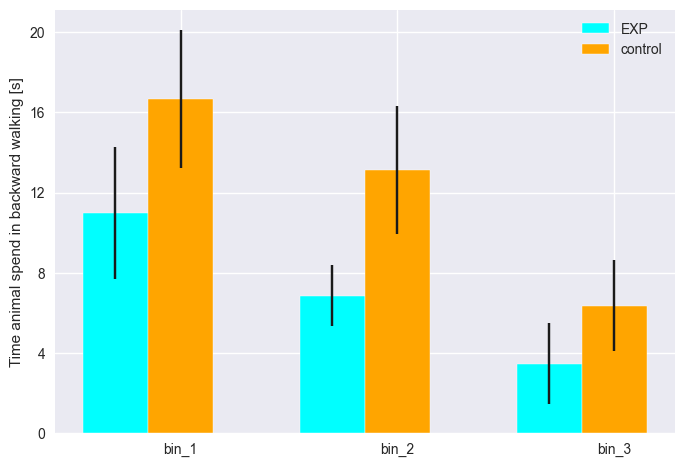

In [126]:
#  Graph
plt.style.use("seaborn")
x = np.arange(3)
width = 0.3
plt.bar(x -0.3, sum_back_mean_exp, width, color='cyan', yerr = sum_back_sem_exp)
plt.bar(x, sum_back_mean_ctrl, width, color='orange', yerr = sum_back_sem_ctrl)

plt.xticks(x, day_list)
plt.ylabel("Time animal spend in backward walking [s]")
plt.yticks(np.arange(0, 21, 4))
plt.legend(["EXP", "control"])
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/backward_bar.svg"
plt.savefig(save_fig_to)
plt.show()

In [127]:
df = easygui.fileopenbox(title="Select a file", filetypes= None, multiple=True)

In [128]:
df_gen_head_body = (pd.read_excel(i) for i in df)

In [129]:
results = pd.DataFrame(columns = ["rat", "Bin", "sum_head_body [s]"])
for index, data_frame in enumerate(df_gen_head_body):
    sum_backward = float(data_frame.loc[(data_frame["Time [s]"] >= 0.5) & (data_frame["Bin"] == "bin_1"), "Time [s]"].sum())
    rat_ = data_frame["Rat_id"].unique()[0]
    bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_1"].unique()[0]
    results.loc[index] = [rat_, bin_, sum_backward]
df_gen_head_body = (pd.read_excel(i) for i in df)
for index, data_frame in enumerate(df_gen_head_body):
    sum_backward = float(data_frame.loc[(data_frame["Time [s]"] >= 0.5) & (data_frame["Bin"] == "bin_2"), "Time [s]"].sum())
    rat_ = data_frame["Rat_id"].unique()[0]
    
    bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_2"].unique()
    if not bin_:
        bin_ = "bin_2"
    else:
        bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_2"].unique()[0]
    results.loc[index+ 15] = [rat_, bin_, sum_backward]
df_gen_head_body = (pd.read_excel(i) for i in df)
for index, data_frame in enumerate(df_gen_head_body):
    sum_backward = float(data_frame.loc[(data_frame["Time [s]"] >= 0.5) & (data_frame["Bin"] == "bin_3"), "Time [s]"].sum())
    rat_ = data_frame["Rat_id"].unique()[0]
    bin_ = data_frame["Bin"][data_frame["Bin"] == "bin_3"].unique()[0]
    results.loc[index + 30] = [rat_, bin_, sum_backward]
    
print(results)

C:\Users\gniew\AppData\Local\Temp\ipykernel_20492\1651190224.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not bin_:


                        rat    Bin  sum_head_body [s]
0         rat1_ctrl_kohEDLC  bin_1             168.59
1         rat2_ctrl_kohEDLC  bin_1             102.28
2         rat5_ctrl_kohEDLC  bin_1             120.11
3         rat5_ctrl_kohFDLC  bin_1              82.77
4         rat6_ctrl_kohFDLC  bin_1              54.31
5   zw1_control_kohAprimDLC  bin_1              45.46
6           zw1_exp_kohCDLC  bin_1              69.69
7          zw2_ctrl_kohCDLC  bin_1              63.38
8          zw3_ctrl_kohCDLC  bin_1              48.13
9           zw4_exp_kohCDLC  bin_1             101.62
10         zw6_ctrl_kohDDLC  bin_1             107.46
11      zw7_exp_kohAprimDLC  bin_1             134.66
12          zw7_exp_kohDDLC  bin_1              44.58
13     zw11_exp_kohAprimDLC  bin_1             112.17
14     zw12_exp_kohAprimDLC  bin_1              56.02
15        rat1_ctrl_kohEDLC  bin_2              74.09
16        rat2_ctrl_kohEDLC  bin_2              61.62
17        rat5_ctrl_kohEDLC 

In [130]:
group_ = ["exp" if "exp" in i else "ctrl" for i in results["rat"] ]
results["group"] = group_

In [131]:
# Check normality
#pt.normality(results.loc[(results["Bin"] == "bin_1") & (results["group"] == "ctrl"), "sum_head_body [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_1") & (results["group"] == "exp"), "sum_head_body [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_2") & (results["group"] == "ctrl"), "sum_head_body [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_2") & (results["group"] == "exp"), "sum_head_body [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_3") & (results["group"] == "ctrl"), "sum_head_body [s]"])
#pt.normality(results.loc[(results["Bin"] == "bin_3") & (results["group"] == "exp"), "sum_head_body [s]"])

In [132]:
exp = results.loc[results["group"] == "exp", "sum_head_body [s]"].values.tolist()
ctrl = results.loc[results["group"] == "ctrl", "sum_head_body [s]"].values.tolist()
day_list = ["bin_1", "bin_2", "bin_3"]
sum_head_body = exp + ctrl
dv_anova["sum_head_body"] = sum_head_body
sum_head_body_mean_exp = [results.loc[(results["Bin"] == i) & (results["group"] == "exp"), "sum_head_body [s]"].mean() for i in day_list]
sum_head_body_mean_ctrl = [results.loc[(results["Bin"] == j) & (results["group"] == "ctrl"), "sum_head_body [s]"].mean() for j in day_list]

sum_head_body_sem_exp = [results.loc[(results["Bin"] == i) & (results["group"] == "exp"), "sum_head_body [s]"].sem() for i in day_list]
sum_head_body_sem_ctrl = [results.loc[(results["Bin"] == j) & (results["group"] == "ctrl"), "sum_head_body [s]"].sem() for j in day_list]


In [133]:
pt.mixed_anova(data=dv_anova, dv="sum_head_body", between="group", within="day", subject='subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,group,36.711828,1,13,36.711828,0.005637,0.941296,0.000433,NaN
1,day,8.524698,2,26,4.262349,0.002000,0.998002,0.000154,0.883925
2,Interaction,931.666110,2,26,465.833055,0.218556,0.805140,0.016534,NaN


In [134]:
dv_anova

,group,day,subject,time_open,time_center,min_dist_open,episodes_mobility_open,episodes_mobility_close,episodes_mobility,velocity_mobility_total,velocity_mobility_close,distance_mobility_total_open,distance_mobility_total_close,entry_open_total,sum_back,sum_head_body
0,e,Pre_opto,1,1.89,6.93,13.05,1,68,69,16.58,16.70,10.33,1235.09,3,3.55,69.69
1,e,Pre_opto,2,0.16,5.39,28.62,0,70,70,14.74,14.58,0.00,990.57,2,15.05,101.62
2,e,Pre_opto,3,1.90,1.43,18.64,1,39,40,14.74,14.62,19.75,654.40,3,10.93,134.66
3,e,Pre_opto,4,0.80,2.09,0.26,2,64,66,15.33,15.37,52.77,1046.03,2,25.09,44.58
4,e,Pre_opto,5,7.92,9.05,0.13,11,59,70,15.27,16.26,184.91,1262.54,10,5.32,112.17
5,e,Pre_opto,6,22.54,10.79,0.09,42,31,73,15.81,17.22,630.61,678.58,22,5.90,56.02
6,e,Opto,1,6.77,8.19,0.45,4,66,70,16.09,16.28,38.08,1221.77,4,5.55,118.65
7,e,Opto,2,0.00,5.87,34.15,0,16,16,11.81,11.79,0.00,154.89,0,8.83,75.94
8,e,Opto,3,0.48,0.79,28.73,0,17,17,14.19,13.65,0.00,267.35,1,10.16,123.34
9,e,Opto,4,0.96,3.69,18.30,0,24,24,12.52,12.41,0.00,320.96,1,8.46,85.79


C:\Users\gniew\AppData\Local\Temp\ipykernel_20492\2023485293.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


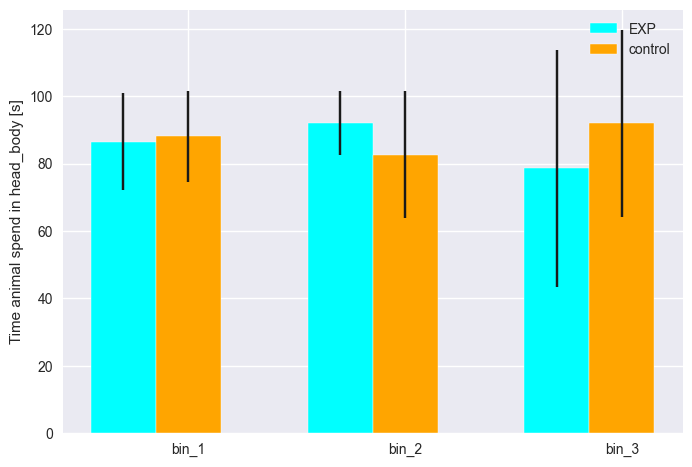

In [135]:
#  Graph
plt.style.use("seaborn")
x = np.arange(3)
width = 0.3
plt.bar(x -0.3, sum_head_body_mean_exp, width, color='cyan', yerr = sum_head_body_sem_exp)
plt.bar(x, sum_head_body_mean_ctrl, width, color='orange', yerr = sum_head_body_sem_ctrl)

plt.xticks(x, day_list)
plt.ylabel("Time animal spend in head_body [s]")
plt.legend(["EXP", "control"])
save_fig_to = "C:/Users/gniew/Desktop/Data_EPM/Results/head_body.svg"
plt.savefig(save_fig_to)
plt.show()